This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [17]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 15ms/step - loss: 0.6126 - accuracy: 0.8136 - val_loss: 0.2604 - val_accuracy: 0.9220
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2495 - accuracy: 0.9224 - val_loss: 0.1945 - val_accuracy: 0.9417
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1609 - accuracy: 0.9500 - val_loss: 0.2084 - val_accuracy: 0.9385
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1144 - accuracy: 0.9634 - val_loss: 0.2316 - val_accuracy: 0.9306
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0846 - accuracy: 0.9731 - val_loss: 0.1523 - val_accuracy: 0.9509
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0640 - accuracy: 0.9791 - val_loss: 0.1239 - val_accuracy: 0.9647
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0470 - accuracy: 0.9851 - val_loss: 0.1253 - val_accuracy: 0.9663

**Plotting a validation accuracy comparison**

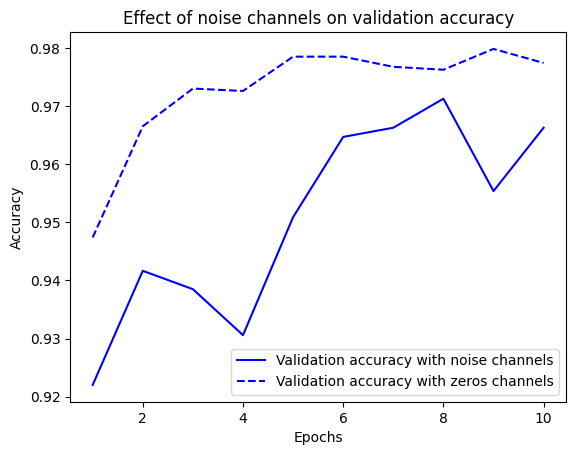

In [27]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [28]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 8ms/step - loss: 2.3170 - accuracy: 0.1044 - val_loss: 2.3069 - val_accuracy: 0.1084
Epoch 2/2
375/375 [==============================] - 3s 7ms/step - loss: 2.2992 - accuracy: 0.1180 - val_loss: 2.3179 - val_accuracy: 0.1063


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [29]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 8ms/step - loss: 1085.8263 - accuracy: 0.4481 - val_loss: 2.1917 - val_accuracy: 0.3062
Epoch 2/2
375/375 [==============================] - 3s 8ms/step - loss: 5.1420 - accuracy: 0.2969 - val_loss: 2.7571 - val_accuracy: 0.2892


**The same model with a more appropriate learning rate**

In [30]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 8ms/step - loss: 0.3818 - accuracy: 0.9076 - val_loss: 0.1434 - val_accuracy: 0.9597
Epoch 2/2
375/375 [==============================] - 3s 7ms/step - loss: 0.1388 - accuracy: 0.9644 - val_loss: 0.1573 - val_accuracy: 0.9640


### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [31]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 1ms/step - loss: 0.6636 - accuracy: 0.8400 - val_loss: 0.3560 - val_accuracy: 0.9055
Epoch 2/2
375/375 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.9045 - val_loss: 0.3069 - val_accuracy: 0.9166


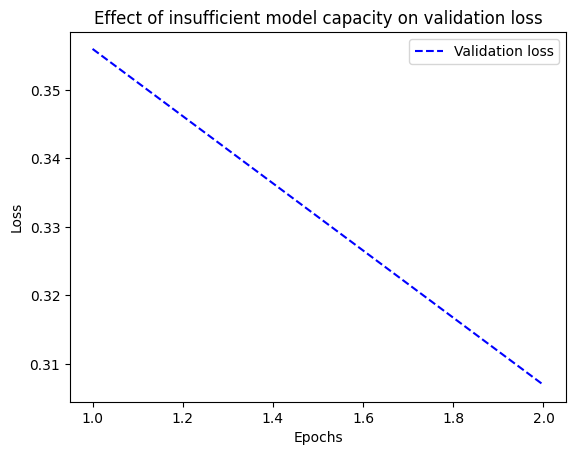

In [34]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [35]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8944 - val_loss: 0.1991 - val_accuracy: 0.9428
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 0.1646 - accuracy: 0.9512 - val_loss: 0.1584 - val_accuracy: 0.9530


## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [36]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 31ms/step - loss: 0.4991 - accuracy: 0.7819 - val_loss: 0.3690 - val_accuracy: 0.8714
Epoch 2/2
30/30 [==============================] - 1s 19ms/step - loss: 0.2904 - accuracy: 0.9065 - val_loss: 0.3080 - val_accuracy: 0.8800


**Version of the model with lower capacity**

In [37]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 27ms/step - loss: 0.5786 - accuracy: 0.7712 - val_loss: 0.4910 - val_accuracy: 0.8355
Epoch 2/2
30/30 [==============================] - 1s 18ms/step - loss: 0.4263 - accuracy: 0.8847 - val_loss: 0.4030 - val_accuracy: 0.8689


**Version of the model with higher capacity**

In [38]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 4s 119ms/step - loss: 0.5402 - accuracy: 0.7643 - val_loss: 0.5460 - val_accuracy: 0.7457
Epoch 2/2
30/30 [==============================] - 3s 105ms/step - loss: 0.2610 - accuracy: 0.8961 - val_loss: 0.3063 - val_accuracy: 0.8750


#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [39]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 27ms/step - loss: 0.6370 - accuracy: 0.7556 - val_loss: 0.5224 - val_accuracy: 0.8301
Epoch 2/2
30/30 [==============================] - 1s 18ms/step - loss: 0.4482 - accuracy: 0.8857 - val_loss: 0.4266 - val_accuracy: 0.8799


**Different weight regularizers available in Keras**

In [40]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [41]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 33ms/step - loss: 0.6349 - accuracy: 0.6288 - val_loss: 0.5279 - val_accuracy: 0.8158
Epoch 2/2
30/30 [==============================] - 1s 21ms/step - loss: 0.5342 - accuracy: 0.7487 - val_loss: 0.4295 - val_accuracy: 0.8742


## Summary